# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
data = pd.read_csv('/content/demo01.csv')

In [33]:
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [35]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [36]:
data.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

<Axes: xlabel='mau', ylabel='Count'>

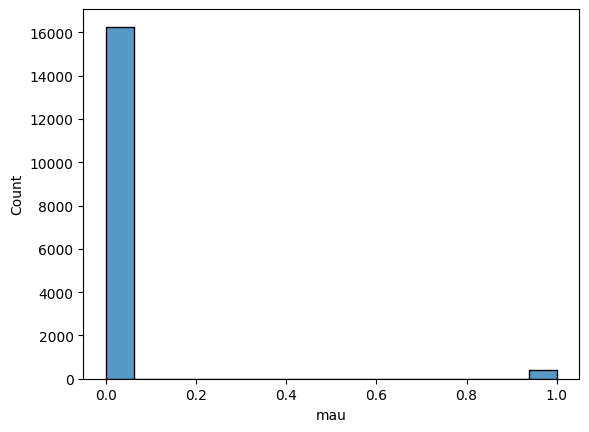

In [37]:
sns.histplot(data['mau'])

In [38]:
data['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [39]:
colunas ={'variaveis': ['sexo','posse_de_veiculo', 'posse_de_imovel',
                                       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
                                       'tipo_residencia', 'idade', 'tempo_emprego',
                                       'possui_celular', 'possui_fone_comercial',
                                       'possui_fone', 'possui_email',
                                       'qt_pessoas_residencia', 'mau']}
metadados = pd.DataFrame(data = colunas)
metadados

,variaveis
0,sexo
1,posse_de_veiculo
2,posse_de_imovel
3,qtd_filhos
4,tipo_renda
5,educacao
6,estado_civil
7,tipo_residencia
8,idade
9,tempo_emprego


In [40]:
qtd_unica = []
for columns in data:
  qtd_unica.append(data[columns].nunique())
print(qtd_unica)

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]


In [41]:
metadados = metadados.assign(qtd = qtd_unica)
metadados

,variaveis,qtd
0,sexo,2
1,posse_de_veiculo,2
2,posse_de_imovel,2
3,qtd_filhos,8
4,tipo_renda,5
5,educacao,5
6,estado_civil,5
7,tipo_residencia,6
8,idade,5298
9,tempo_emprego,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [42]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [43]:
data_encoded = pd.get_dummies(data, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel'], drop_first = True)
data_encoded.head(2)

,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False,1,1,1
1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,0,0,1


In [44]:
columns_drop = ['tipo_renda','educacao','estado_civil','tipo_residencia']
data_encoded = data_encoded.drop(columns_drop, axis=1)
data_encoded.head(2)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,0,1


In [45]:
data_encoded.mau = data_encoded.mau.astype(int)
data_encoded.head(2)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [48]:
pd.crosstab(index = data_encoded['possui_email'], columns = data_encoded['mau'])

mau,0,1
possui_email,,
0,14810,360
1,1450,30


In [50]:
pd.crosstab(index = data_encoded['posse_de_veiculo_Y'], columns = data_encoded['mau'])

mau,0,1
posse_de_veiculo_Y,,
0,9931,247
1,6329,143


Mais de 90% das pessoas que não têm email são bons pagadores, enquanto que 60% das pessoas que não possuem veículo são bons pagadores. Logo, a variavel possui_email é melhor para prever bons pagadores

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [52]:
data_encoded.to_csv('data_encoded.csv', sep = ',')